In [194]:
import numpy as np
import math
from matplotlib import pyplot as plt

def makegausslpfir(Fc=100, Fs=1250, s=4):
    # % makegausslpfir        Gaussian LP filter
    # %
    # % win = makegausslpfir( Fc, Fs, s )
    # %
    # % Fc    corner frequency [Hz]
    # % Fs    sampling frequency [Hz]
    # % s     support [SD], minimum 3, default 4
    # %
    # % win   fir
    # %
    # % see also  firfilter

    # % 02-oct-13 ES
    # 20-dec-20 RH to python
    
    s = max( s, 3 )

    sd = Fs / ( 2 * np.pi * Fc )
    x = np.arange(-math.ceil( s * sd ), math.ceil( s * sd ))
    gwin = 1/( 2 * np.pi * sd ) * np.exp( -( x**2/2/sd**2 ) )
    gwin = gwin / sum( gwin )

    return gwin

def firfilt(x,W):
    from scipy import signal

    # % FIRFILT       FIR filtering with zero phase distortion.
    # %
    # %               matrix columns are filtered;
    # %               output is a column vector / matrix.

    # % 19-Jul-02 ES
    # % 27-jan-03 zero phase lag
    # 20-dec-20 RH to python
    
    C = len(W)
    D = math.ceil(C/2) - 1

    x = np.concatenate((np.flipud(x[0:C]),x,np.flipud(x[-C:])))
    Y = signal.lfilter(W,1,x)
#     Y = Y[C+D:len(Y)-C+D]
    Y = Y[C:-C]

    return Y

def bandpass_filter(signal,rip_bp=[80,250],fs=1250):
    # filter and process ripples, using Eran's defaults (diff of Gaussians)
    hRip1 = makegausslpfir(rip_bp[0], fs, 6 )
    hRip2 = makegausslpfir(rip_bp[1], fs, 6 )
    high = firfilt( signal, hRip2 )   # highpass filter
    lo = firfilt( high, hRip1 )   # lowpass filter         
    return high - lo # difference of Gaussians

In [209]:
def makegausslpfir(Fc=100, Fs=1250, s=4):
    # % makegausslpfir        Gaussian LP filter
    # %
    # % win = makegausslpfir( Fc, Fs, s )
    # %
    # % Fc    corner frequency [Hz]
    # % Fs    sampling frequency [Hz]
    # % s     support [SD], minimum 3, default 4
    # %
    # % win   fir
    # %
    # % see also  firfilter

    # % 02-oct-13 ES
    # 20-dec-20 RH to python
    
    s = max( s, 3 )

    sd = Fs / ( 2 * np.pi * Fc )
    x = np.arange(-math.ceil( s * sd ), math.ceil( s * sd ))
    gwin = 1/( 2 * np.pi * sd ) * np.exp( -( x**2/2/sd**2 ) )
    gwin = gwin / sum( gwin )

    return gwin

def firfilt(x,W):
    from scipy import signal

    # % FIRFILT       FIR filtering with zero phase distortion.
    # %
    # %               matrix columns are filtered;
    # %               output is a column vector / matrix.

    # % 19-Jul-02 ES
    # % 27-jan-03 zero phase lag
    # 20-dec-20 RH to python
    
    C = len(W)
    D = math.ceil(C/2) - 1

    x = np.concatenate((np.flipud(x[0:C]),x,np.flipud(x[len(x)-C-1:-1])))
    Y = signal.lfilter(W,1,x)
    Y = Y[C+D:len(Y)-C+D]

    return Y

def bandpass_filter(signal,rip_bp=[80,250],fs=1250):
    # filter and process ripples, using Eran's defaults (diff of Gaussians)
    hRip1 = makegausslpfir(rip_bp[0], fs, 6 )
    hRip2 = makegausslpfir(rip_bp[1], fs, 6 )
    high = firfilt( signal, hRip2 )   # highpass filter
    lo = firfilt( high, hRip1 )   # lowpass filter         
    return high - lo # difference of Gaussians

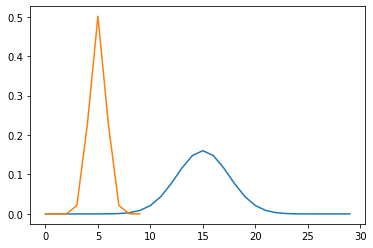

In [189]:
plt.plot(makegausslpfir(Fc=80, Fs=1250, s=6))
plt.plot(makegausslpfir(Fc=250, Fs=1250, s=6))

In [206]:
x = np.arange(1,10)
print(x)

W = np.arange(20,23)
C = len(W)
D = math.ceil(C/2)-1

print(np.flipud(x[0:C]))
print(np.flipud(x[len(x)-C:len(x)]))

# Y = filter(W,1,[flipud(x(1:C,:)); x; flipud(x(end-C+1:end,:))]);
# Y = Y(1+C+D:end-C+D,:);

x2 = np.concatenate((np.flipud(x[0:C]),x,np.flipud(x[-C:])))
print(x2)
# x2 = x2[C+D:len(x2)-C+D]
x2 = x2[C:-C]
print(x2)

[1 2 3 4 5 6 7 8 9]
[3 2 1]
[9 8 7]
[3 2 1 1 2 3 4 5 6 7 8 9 9 8 7]
[2 3 4 5 6 7 8]


In [205]:
D

1

In [3]:
# Import burst detection functions
from neurodsp.burst import detect_bursts_dual_threshold, compute_burst_stats

# Import simulation code for creating test data
from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed, create_times

# Import utilities for loading and plotting data
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.time_series import plot_time_series, plot_bursts

In [4]:
# Set the random seed, for consistency simulating data
set_random_seed(0)

In [199]:
# Simulation settings
fs = 1250
n_seconds = 5

# Define simulation components
components = {'sim_synaptic_current' : {'n_neurons':1000, 'firing_rate':2,
                                        't_ker':1.0, 'tau_r':0.002, 'tau_d':0.02},
              'sim_bursty_oscillation' : {'freq' : 180, 'enter_burst' : 2, 'leave_burst' : 2.1}}

# Simulate a signal with a bursty oscillation with an aperiodic component & a time vector
sig = sim_combined(n_seconds, fs, components)
times = create_times(n_seconds, fs)

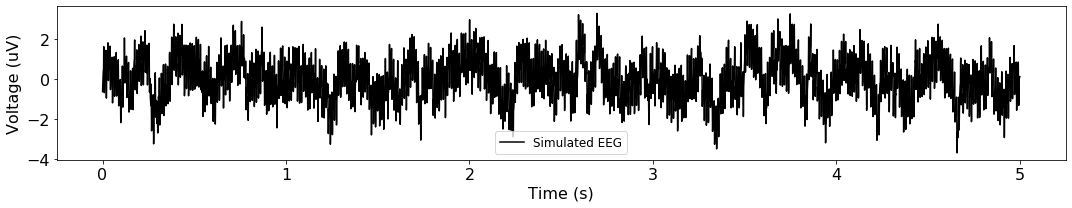

In [200]:
# Plot the simulated data
plot_time_series(times, sig, 'Simulated EEG')

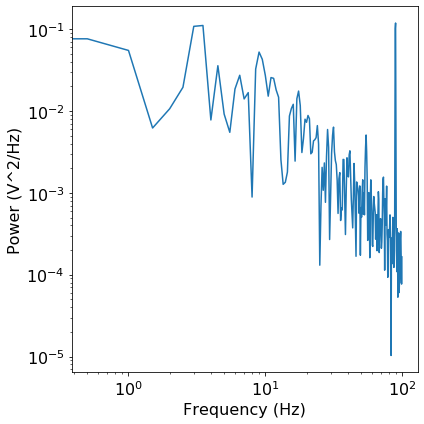

In [201]:
from neurodsp.spectral import compute_spectrum, rotate_powerlaw
from neurodsp.plts.spectral import plot_power_spectra

freq_mean, psd_mean = compute_spectrum(sig, fs, method='welch', avg_type='mean', nperseg=fs*2)
plot_power_spectra(freq_mean[:200],psd_mean[:200])

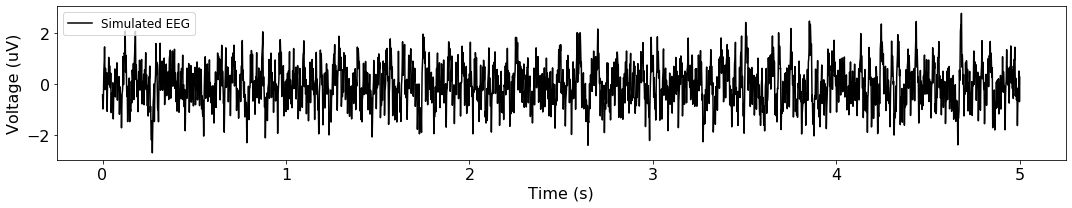

In [202]:
sig_bf = bandpass_filter(sig,rip_bp=[80,250],fs=1250)
plot_time_series(times, sig_bf, 'Simulated EEG')


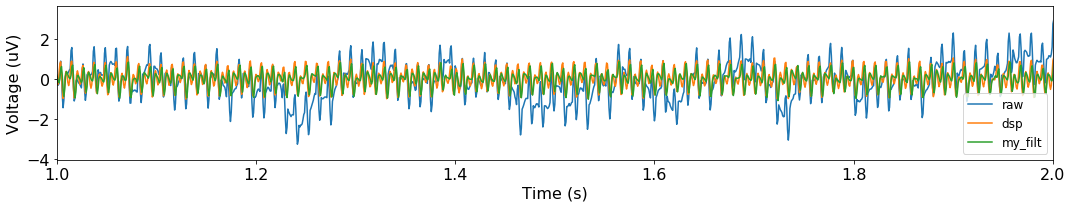

In [210]:
from neurodsp.filt import filter_signal

f_range = (80, 250)
sig_bf = bandpass_filter(sig,rip_bp=[f_range[0],f_range[1]],fs=fs)
sig_filt = filter_signal(sig, fs, 'bandpass', f_range)

plot_time_series(times, [sig,sig_filt,sig_bf],  ['raw','dsp','my_filt'], xlim=[1, 2])
# plot_time_series(times, [sig,sig_bf], ['raw','filtered'], xlim=[2, 2.5])



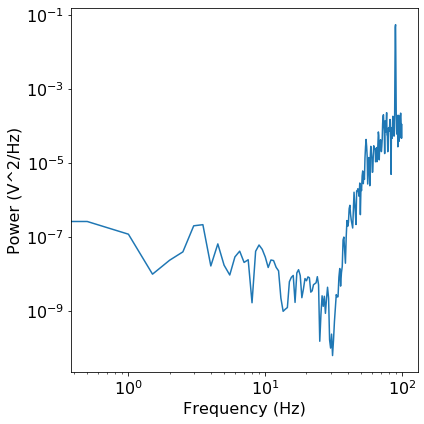

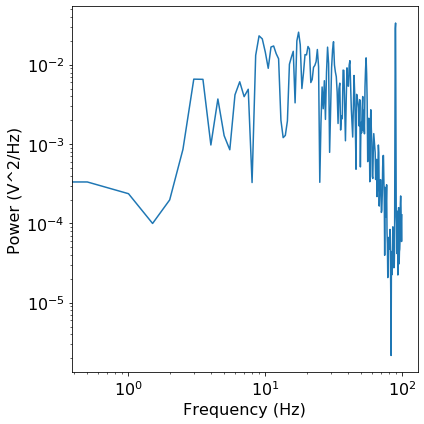

In [204]:
freq_mean, psd_mean = compute_spectrum(sig_filt[~np.isnan(sig_filt)], fs, method='welch', avg_type='mean', nperseg=fs*2)
plot_power_spectra(freq_mean[:200],psd_mean[:200])

freq_mean, psd_mean = compute_spectrum(sig_bf, fs, method='welch', avg_type='mean', nperseg=fs*2)
plot_power_spectra(freq_mean[:200],psd_mean[:200])

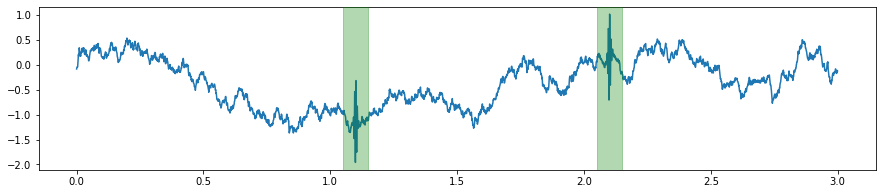

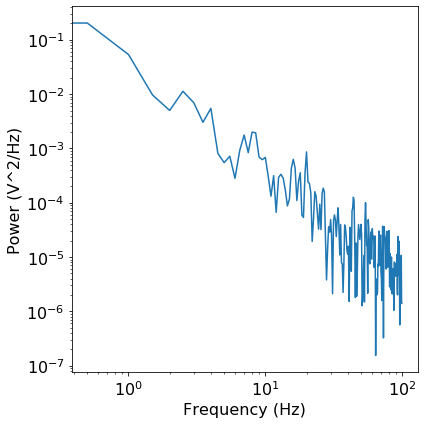

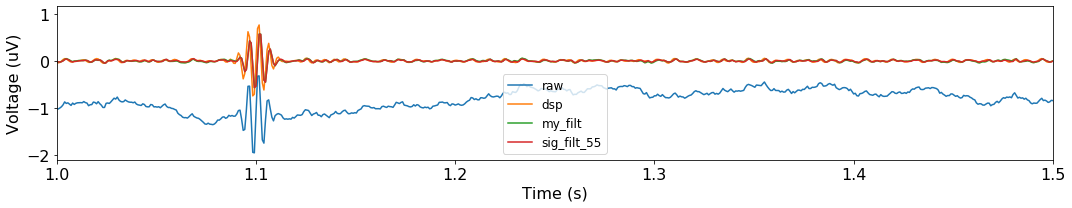

In [219]:
from ripple_detection.simulate import simulate_LFP
import time
from ripple_detection.simulate import simulate_time, brown

SAMPLING_FREQUENCY = 1250
n_samples = SAMPLING_FREQUENCY * 3
time = simulate_time(n_samples, SAMPLING_FREQUENCY)

true_ripple_midtime = [1.1, 2.1]
RIPPLE_DURATION = 0.100
lfps = simulate_LFP(time, true_ripple_midtime,
                    noise_amplitude=1.2,
                    ripple_amplitude=2)[:, np.newaxis]
speed = np.ones_like(time)

fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(time, lfps)


for midtime in true_ripple_midtime:
    plt.axvspan(midtime - RIPPLE_DURATION/2,
                midtime + RIPPLE_DURATION/2, alpha=0.3, color='green', zorder=1000)
    
    
freq_mean, psd_mean = compute_spectrum(lfps[:,0], fs, method='welch', avg_type='mean', nperseg=fs*2)
plot_power_spectra(freq_mean[:200],psd_mean[:200])
# plt.figure()
# plt.plot(freq_mean[:500],psd_mean[:500])

f_range = (80, 250)
sig_bf = bandpass_filter(lfps[:,0],rip_bp=[f_range[0],f_range[1]],fs=fs)
sig_filt = filter_signal(lfps[:,0], fs, 'bandpass', f_range,filter_type='fir')

f_range = (55, None)
sig_filt_55 = filter_signal(sig_bf, fs, 'highpass', f_range,filter_type='fir')

plot_time_series(time, [lfps[:,0],sig_filt,sig_bf,sig_filt_55],  ['raw','dsp','my_filt','sig_filt_55'],xlim=[1,1.5])



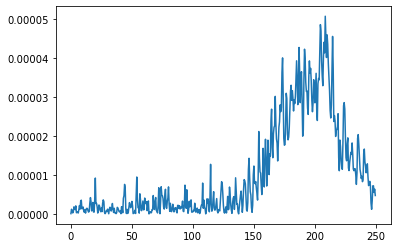

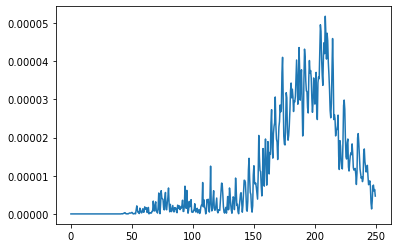

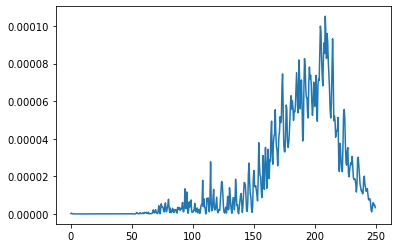

In [220]:
freq_mean, psd_mean = compute_spectrum(sig_bf, fs, method='welch', avg_type='mean', nperseg=fs*2)
plt.figure()
plt.plot(freq_mean[:500],psd_mean[:500])

freq_mean, psd_mean = compute_spectrum(sig_filt_55[~np.isnan(sig_filt_55)], fs, method='welch', avg_type='mean', nperseg=fs*2)
plt.figure()
plt.plot(freq_mean[:500],psd_mean[:500])

freq_mean, psd_mean = compute_spectrum(sig_filt[~np.isnan(sig_filt)], fs, method='welch', avg_type='mean', nperseg=fs*2)
plt.figure()
plt.plot(freq_mean[:500],psd_mean[:500])

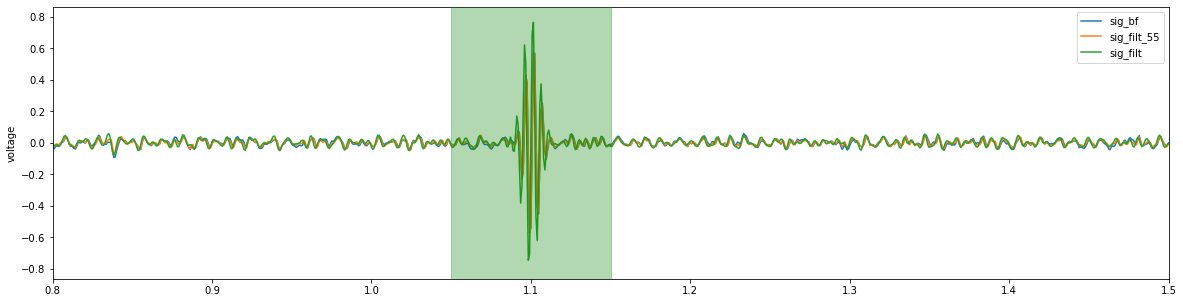

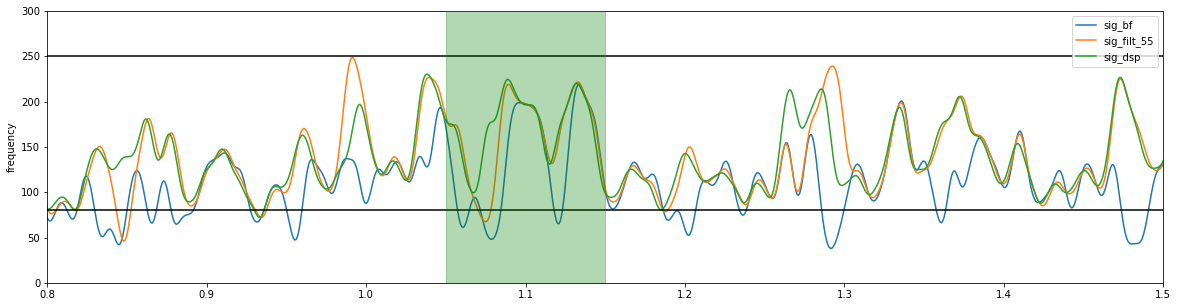

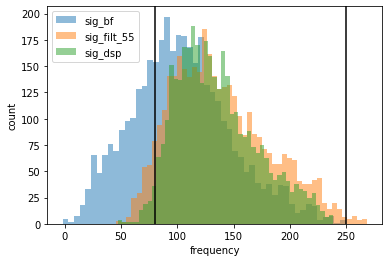

In [280]:
from scipy.signal import hilbert,find_peaks
from scipy.ndimage import gaussian_filter1d


def get_if(signal,fs=1250):
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)
    phase = np.angle(analytic_signal)
    instantaneous_phase = np.unwrap(phase)
    return gaussian_filter1d((np.diff(instantaneous_phase) / (2.0*np.pi) * fs),
                                                0.004 * fs, truncate=8, axis=0,mode='constant')

plt.figure(figsize = (20,5))

plt.plot(time,sig_bf,label='sig_bf')
plt.plot(time,sig_filt_55,label='sig_filt_55')
plt.plot(time,sig_filt,label='sig_filt')
plt.legend()
plt.xlim(.8,1.5)

for midtime in true_ripple_midtime:
    plt.axvspan(midtime - RIPPLE_DURATION/2,
                midtime + RIPPLE_DURATION/2, alpha=0.3, color='green', zorder=1000)
plt.ylabel('voltage')


sig_filt[np.isnan(sig_filt)] = 0
sig_filt_55[np.isnan(sig_filt_55)] = 0
plt.figure(figsize = (20,5))
plt.plot(time[0:-1],get_if(sig_bf),label='sig_bf')
plt.plot(time[0:-1],get_if(sig_filt_55),label='sig_filt_55')
plt.plot(time[0:-1],get_if(sig_filt),label='sig_dsp')
plt.legend()
plt.axhline(80,color='k')
plt.axhline(250,color='k')
# plt.axvline(1.1)
plt.xlim(.8,1.5)

for midtime in true_ripple_midtime:
    plt.axvspan(midtime - RIPPLE_DURATION/2,
                midtime + RIPPLE_DURATION/2, alpha=0.3, color='green', zorder=1000)
plt.ylim(0,300) 
plt.ylabel('frequency')
    
f_range = (80, 250)
sig_bf = bandpass_filter(lfps[:,0],rip_bp=[f_range[0],f_range[1]],fs=fs)
sig_filt = filter_signal(lfps[:,0], fs, 'bandpass', f_range,filter_type='fir')
f_range = (55, None)
sig_filt_55 = filter_signal(sig_bf, fs, 'highpass', f_range,filter_type='fir')
plt.figure()
plt.hist(get_if(sig_bf),50,alpha=.5,label='sig_bf')
plt.hist(get_if(sig_filt_55[~np.isnan(sig_filt_55)]),50,alpha=.5,label='sig_filt_55')
plt.hist(get_if(sig_filt[~np.isnan(sig_filt)]),50,alpha=.5,label='sig_dsp')
plt.axvline(80,color='k')
plt.axvline(250,color='k')
plt.ylabel('count')
plt.xlabel('frequency')

plt.legend()
plt.show()

In [257]:
((get_if(sig_filt)<80) | (get_if(sig_filt)>250) ).sum()

148

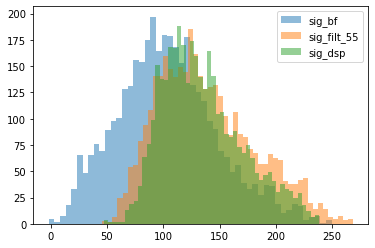

In [272]:
f_range = (80, 250)
sig_bf = bandpass_filter(lfps[:,0],rip_bp=[f_range[0],f_range[1]],fs=fs)
sig_filt = filter_signal(lfps[:,0], fs, 'bandpass', f_range,filter_type='fir')
f_range = (55, None)
sig_filt_55 = filter_signal(sig_bf, fs, 'highpass', f_range,filter_type='fir')

plt.hist(get_if(sig_bf),50,alpha=.5,label='sig_bf')
plt.hist(get_if(sig_filt_55[~np.isnan(sig_filt_55)]),50,alpha=.5,label='sig_filt_55')
plt.hist(get_if(sig_filt[~np.isnan(sig_filt)]),50,alpha=.5,label='sig_dsp')
plt.legend()
plt.show()

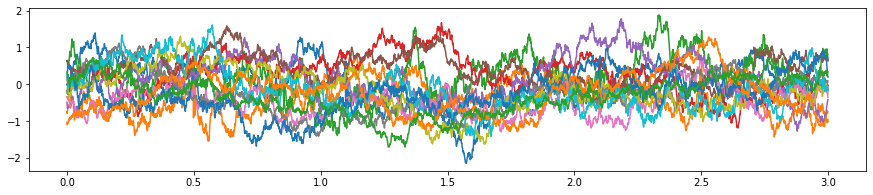

In [281]:
lfps = np.stack((
    simulate_LFP(time, [1.1, 2.1], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [0.5, 2.5], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    ), axis=1)
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
speed = np.ones_like(time)

In [320]:
def get_phase_amp_freq(sig,fs):
    
    phas = []
    amp = []
    freq = []
    
    for signal in sig.T:
        analytic_signal = hilbert(signal)
        amplitude_envelope = np.abs(analytic_signal)
        phase = np.angle(analytic_signal)
        instantaneous_phase = np.unwrap(phase)
        instantaneous_frequency = gaussian_filter1d((np.diff(instantaneous_phase) / (2.0*np.pi) * fs),
                                                    0.004 * fs, truncate=8, axis=0,mode='constant')
        phas.append(phase)
        amp.append(amplitude_envelope)
        freq.append(instantaneous_frequency)
    
    phas = np.vstack(phas) 
    amp = np.vstack(amp)
    freq = np.vstack(freq) 

    return phas.T,amp.T,freq.T

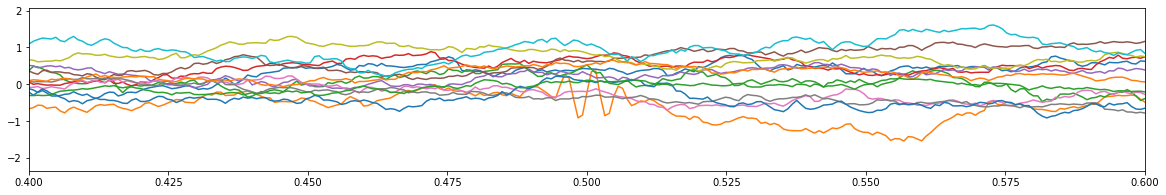

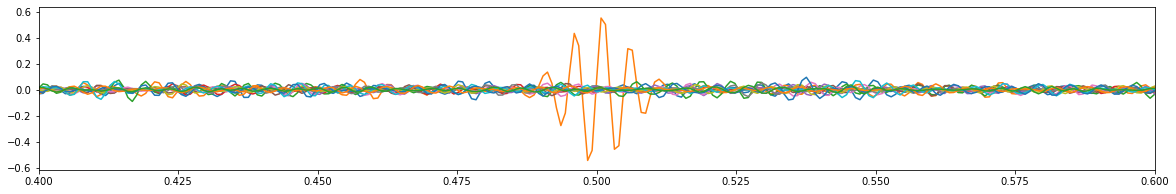

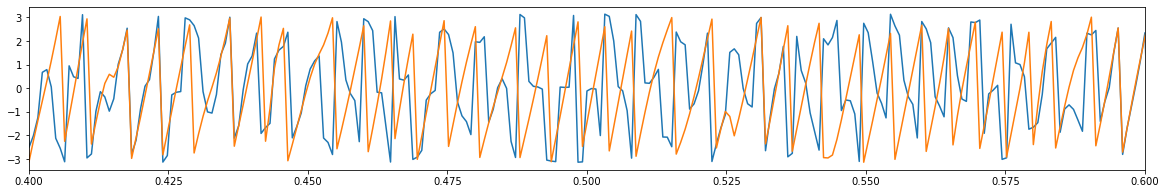

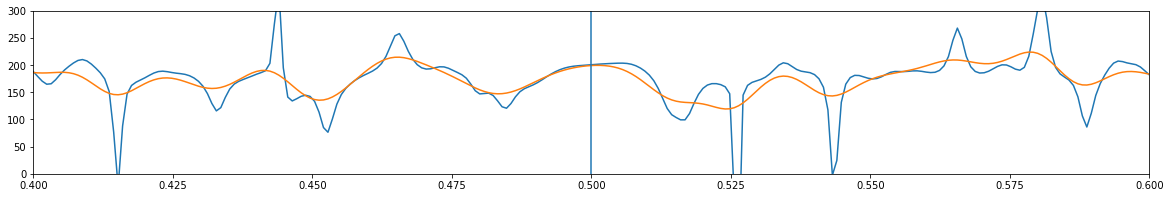

In [336]:
from neurodsp.timefrequency import amp_by_time, freq_by_time, phase_by_time
from neurodsp.filt import filter_signal


fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(time, lfps)
speed = np.ones_like(time)
plt.xlim(0.4,0.6)

f_range = (150, 250)

LFPs = lfps
filtered_lfps = np.stack([filter_signal(lfp, fs, 'bandpass', f_range,remove_edges=False) for lfp in LFPs.T])
filtered_lfps = filtered_lfps.T
     
plt.figure(figsize=(20,3))
plt.plot(time,filtered_lfps)
plt.xlim(0.4,0.6)

phas,amp,freq = get_phase_amp_freq(filtered_lfps,fs)

pha = phase_by_time(filtered_lfps, fs)

plt.figure(figsize=(20,3))
plt.plot(time,pha[:,1])
plt.plot(time,phas[:,1])

plt.xlim(0.4,0.6)

i_f = np.stack([freq_by_time(lfp, fs, f_range,remove_edges=False) for lfp in LFPs.T])
i_f = i_f.T
plt.figure(figsize=(20,3))
plt.plot(time,i_f[:,1])
plt.plot(time[0:-1],freq[:,1])
plt.xlim(0.4,0.6)
plt.ylim(0,300)

plt.axvline(.5)



In [329]:
phas,amp,freq = get_phase_amp_freq(filtered_lfps,fs)
# freq = np.insert(freq, 1, np.nan)
# freq.shape

freq.shape

(3749, 13)